# **Experiment 8: Texture Segmentation using Gabor Filters.**
Implement texture segmentation using a bank of Gabor filters in OpenCV

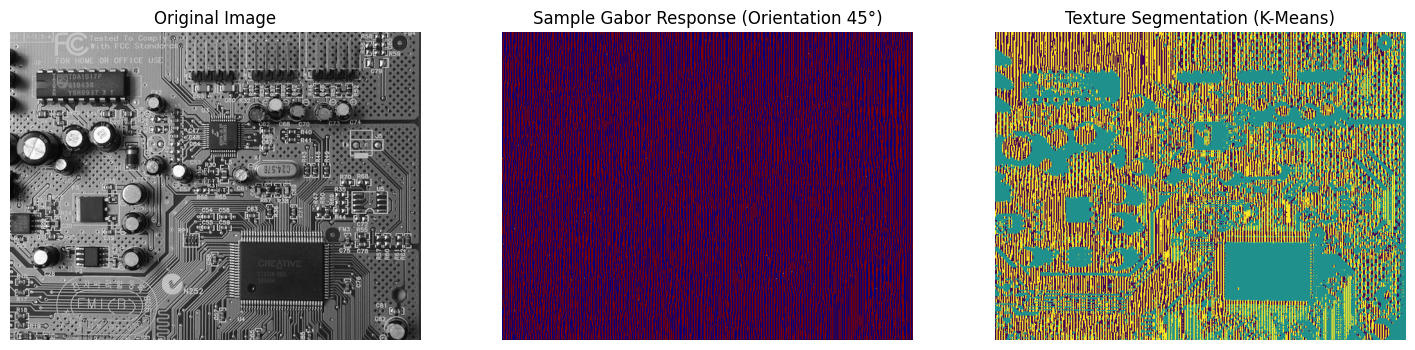

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

def build_filters():
    filters = []
    ksize = 31
    # Define angles (0, 45, 90, 135 degrees)
    for theta in np.arange(0, np.pi, np.pi / 4):
        for sigma in (1.0, 3.0):
            for lamda in (np.pi/4, np.pi/2):
                kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, 0.5, 0, ktype=cv2.CV_32F)
                kern /= 1.5 * kern.sum()
                filters.append(kern)
    return filters

def extract_features(img, filters):
    feature_maps = []
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8U, kern)
        fimg = cv2.GaussianBlur(fimg, (3, 3), 0)
        feature_maps.append(fimg.flatten())
    return np.array(feature_maps).T

# 1. Load Image (Using a reliable OpenCV sample: Checkerboard/Pattern)
!wget -q -O texture_sample.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/board.jpg
image = cv2.imread('texture_sample.jpg')

if image is None:
    print("Error: Image not found. Check your internet connection or URL.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 2. Build Filter Bank and Extract Features
    filters = build_filters()
    features = extract_features(gray, filters)

    # 3. Apply K-Means Clustering (Segment into 3 texture types)
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=0).fit(features)
    segmented = kmeans.labels_.reshape(gray.shape)

    # 4. Visualization
    plt.figure(figsize=(18, 10))

    # Original
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

    # Example of one Gabor Filter Response
    plt.subplot(1, 3, 2)
    sample_filter_res = cv2.filter2D(gray, cv2.CV_8U, filters[2])
    plt.title("Sample Gabor Response (Orientation 45°)")
    plt.imshow(sample_filter_res, cmap='jet')
    plt.axis('off')

    # Segmented Result
    plt.subplot(1, 3, 3)
    plt.title("Texture Segmentation (K-Means)")
    plt.imshow(segmented, cmap='viridis')
    plt.axis('off')

    plt.show()